# start with importing all the data and packages needed

In [1]:
#load all the relevant packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mlt

In [2]:
os.getcwd()

'C:\\Users\\cecilianatalie.strom\\GitHub\\INSA\\Opensanctions\\Clean'

In [3]:
eu = pd.read_csv('df_all.csv',low_memory=False)

# import trigger data

In [4]:
#load trigger data
conflict = pd.read_csv('IV\\ucdp_cleaned.csv')
conflict_os = pd.read_csv('IV\\ucdp_os.csv')
coup= pd.read_csv('IV\\coup_data.csv')
terror= pd.read_csv('IV\\data_gti.csv')
protest= pd.read_csv('IV\\acled_clean.csv')

# All lists

**descriptives**

In [5]:
data = eu.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)


Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'schema', 'name',
       'aliases', 'birth_date', 'countries', 'addresses', 'identifiers',
       'sanctions', 'phones', 'emails', 'dataset', 'last_seen', 'first_seen',
       'date_stamp', 'new_entry', 'deletion', 'unchanged', 'month',
       'listing_count', 'listing_date', 'delisting_date', 'new_listing_count',
       'last_change', 'month_num'],
      dtype='object')
       Unnamed: 0.2  Unnamed: 0.1     Unnamed: 0    date_stamp  listing_count  \
count   5407.000000   5407.000000    5407.000000  5.407000e+03    5407.000000   
mean    2703.000000   2703.000000   58228.826151  2.021267e+07  164109.218421   
std     1561.010784   1561.010784  135901.635329  4.949418e+03   53801.184957   
min        0.000000      0.000000       0.000000  2.021093e+07  134236.000000   
25%     1351.500000   1351.500000    4241.500000  2.021093e+07  147560.000000   
50%     2703.000000   2703.000000    8552.000000  2.021093e+07  147560.000000   


In [39]:
data.dataset.unique()

array(['US BIS Denied Persons List',
       'US OFAC Specially Designated Nationals (SDN) List',
       'US OFAC Consolidated (non-SDN) List', 'EU Sanctions Map'],
      dtype=object)

In [6]:
data = data.sort_values(by=['month'])

In [7]:
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis= 'columns')
data

,Unnamed: 0.2,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,...,new_entry,deletion,unchanged,month,listing_count,listing_date,delisting_date,new_listing_count,last_change,month_num
0,0,NK-226JTDehVMSXex35EbKPmi,Organization,BENA PROPERTIES,BANNA PROPERTIES;BENA,NaN,sy,"Cham Holding Building, Daraa Highway, Sahnaya ...",NaN,Block - Program - SDN List - Executive Order 1...,...,True,False,False,2021-09,147560,20210930,NaN,1,NaN,2021-09
3136,3136,NK-Y7wAjdJ8HbQ7zwYic7KX7U,Person,Agustin GRAJALES HERNANDEZ,NaN,NaN,co,"c/o CASA GRAJALES S.A., La Union, Valle;c/o FR...",2697864,Block - Program - SDN List - Unknown - 2005-05-11,...,True,False,False,2021-09,147560,20210930,NaN,1,NaN,2021-09
3135,3135,NK-Y7hChAQQmaqvSjRcDoaJTM,Airplane,EP-MNJ,NaN,NaN,NaN,NaN,EP-MNJ,Block - Program - SDN List - Executive Order 1...,...,True,False,False,2021-09,147560,20210930,NaN,1,NaN,2021-09
3134,3134,NK-Y7RxA7wCLdPm6kVnneKsd7,Person,Khalil Al-Rahman HAQQANI,Khaleel HAQQANI;Khalil Ahmad HAQQANI;Khalil ur...,1958;1959;1960;1961;1962;1963;1964;1966-01-01,af;pk,"Afghanistan;Kayla Village, near Miram Shah, No...",NaN,Block - Program - SDN List - Unknown - 2011-02-09,...,True,False,False,2021-09,147560,20210930,NaN,1,NaN,2021-09
3133,3133,NK-Y7LnnGyWGCY2JmEqAzsciq,Company,ARVAND PETROCHEMICAL COMPANY,NaN,NaN,ir,"Mahshahr, Site 3, 1584851181;Tehran, East 9th ...",6494,Block - Program - SDN List - Executive Order 1...,...,True,False,False,2021-09,147560,20210930,NaN,1,NaN,2021-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,5392,us-bis-12-19-2023-edson-daniel-montelongo,LegalEntity,EDSON DANIEL MONTELONGO,NaN,NaN,NaN,"INMATE NUMBER: 75304-509, FCI BASTROP P.O. BOX...",NaN,2023-12-19 - 2032-07-22,...,True,True,False,2023-12,563325,20231220,20231220.0,1,2023-12-20T16:57:26,2023-12
5390,5390,us-bis-12-19-2023-angel-huerta-garay,LegalEntity,ANGEL HUERTA-GARAY,NaN,NaN,NaN,"INMATE NUMBER: 67193-509, FCI BEAUMOUT P.O. BO...",NaN,2023-12-19 - 2032-04-26,...,True,True,False,2023-12,563325,20231220,20231220.0,1,2023-12-20T16:57:26,2023-12
5385,5385,us-bis-12-04-2023-belavia-belarusian-airlines,LegalEntity,BELAVIA BELARUSIAN AIRLINES,NaN,NaN,by,"BELARUS, 220004 Minsk, 14A Nemiga St.",NaN,"87 F.R. 37309 6/22/2022, 88 F.R. 38483 6/13/20...",...,True,True,False,2023-12,563325,20231205,20231205.0,1,2023-12-05T00:57:44,2023-12
5397,5397,us-bis-12-19-2023-stephanie-joahna-gloria,LegalEntity,STEPHANIE JOAHNA GLORIA,NaN,NaN,NaN,"INMATE NUMBER: 74313-509, FCI ALICEVILLE FEDER...",NaN,2023-12-19 - 2029-05-23,...,True,True,False,2023-12,563325,20231220,20231220.0,1,2023-12-20T16:57:26,2023-12


In [8]:
print(data.listing_count.unique())

[147560 134236 178374 158999 197126 199961 209697 214939 217052 227160
 218626 220531 231426 247053 303190 306805 281302 275614 277039 373925
 374420 380396 396273 418342 413194 448772 563325]


In [9]:
#get the number of listings per month
listing_month = data.groupby('month').new_listing_count.sum()
listing_month

month
2021-09    4675
2021-11      33
2021-12      33
2022-01      11
2022-02      72
2022-03      52
2022-04      76
2022-05      37
2022-06      15
2022-07       4
2022-08      15
2022-09       9
2022-10      25
2022-11      31
2022-12      21
2023-01      86
2023-02      15
2023-03      19
2023-04      12
2023-05      35
2023-06      26
2023-07      10
2023-08      11
2023-09      21
2023-10      31
2023-11      18
2023-12      14
Name: new_listing_count, dtype: int64

In [10]:
data['listing_month'] = data['new_listing_count'].groupby(data['month']).transform('sum')

In [11]:
print(data.listing_month.unique())

[4675   33   11   72   52   76   37   15    4    9   25   31   21   86
   19   12   35   26   10   18   14]


Text(0.5, 1.0, 'Accumulated monthly listings EU FSF')

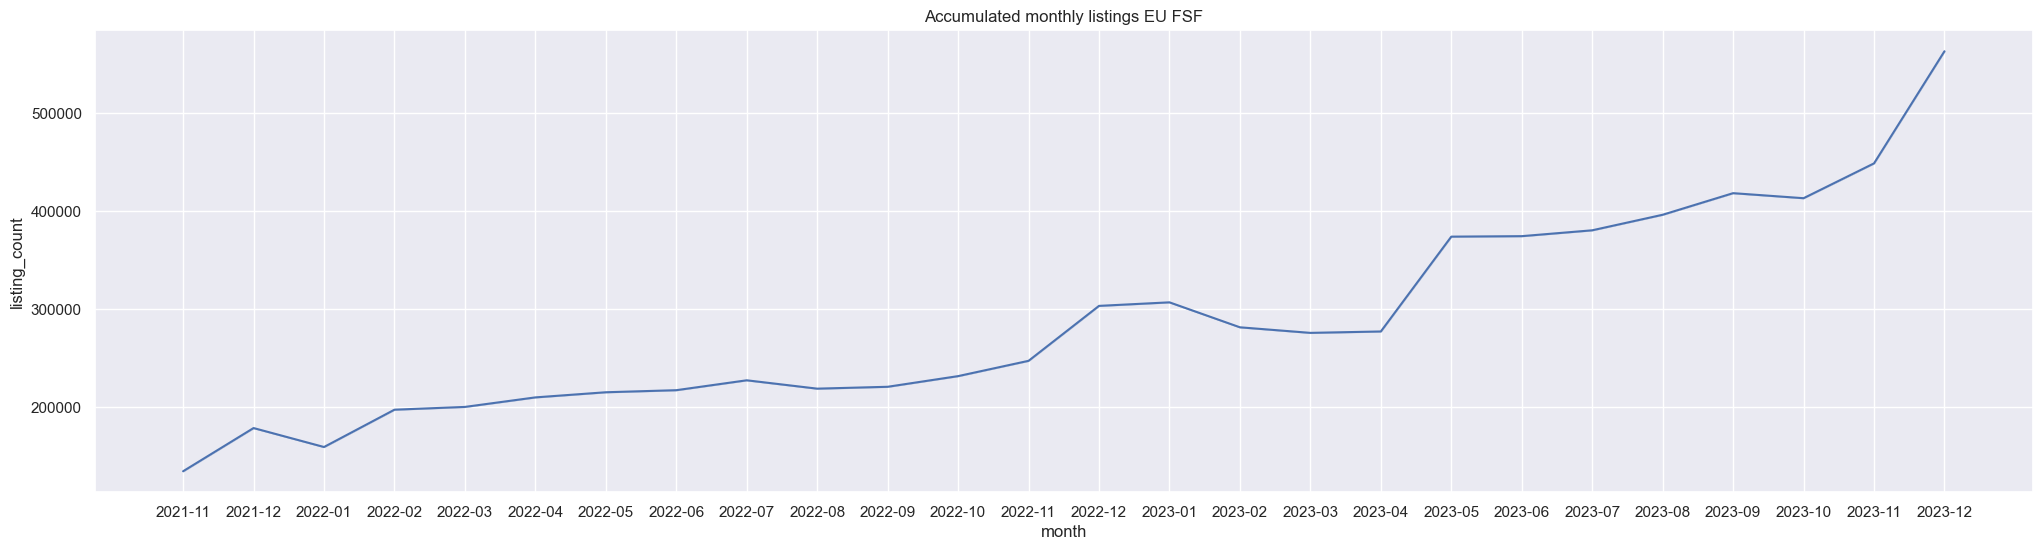

In [12]:
#get the total listings per month
data = data[data['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
listings_eu_fsf = sns.lineplot(data=data,x='month',y='listing_count').set_title('Accumulated monthly listings EU FSF')
listings_eu_fsf.figure.savefig('listings_all')
listings_eu_fsf

Text(0.5, 1.0, 'New monthly listings EU FSF')

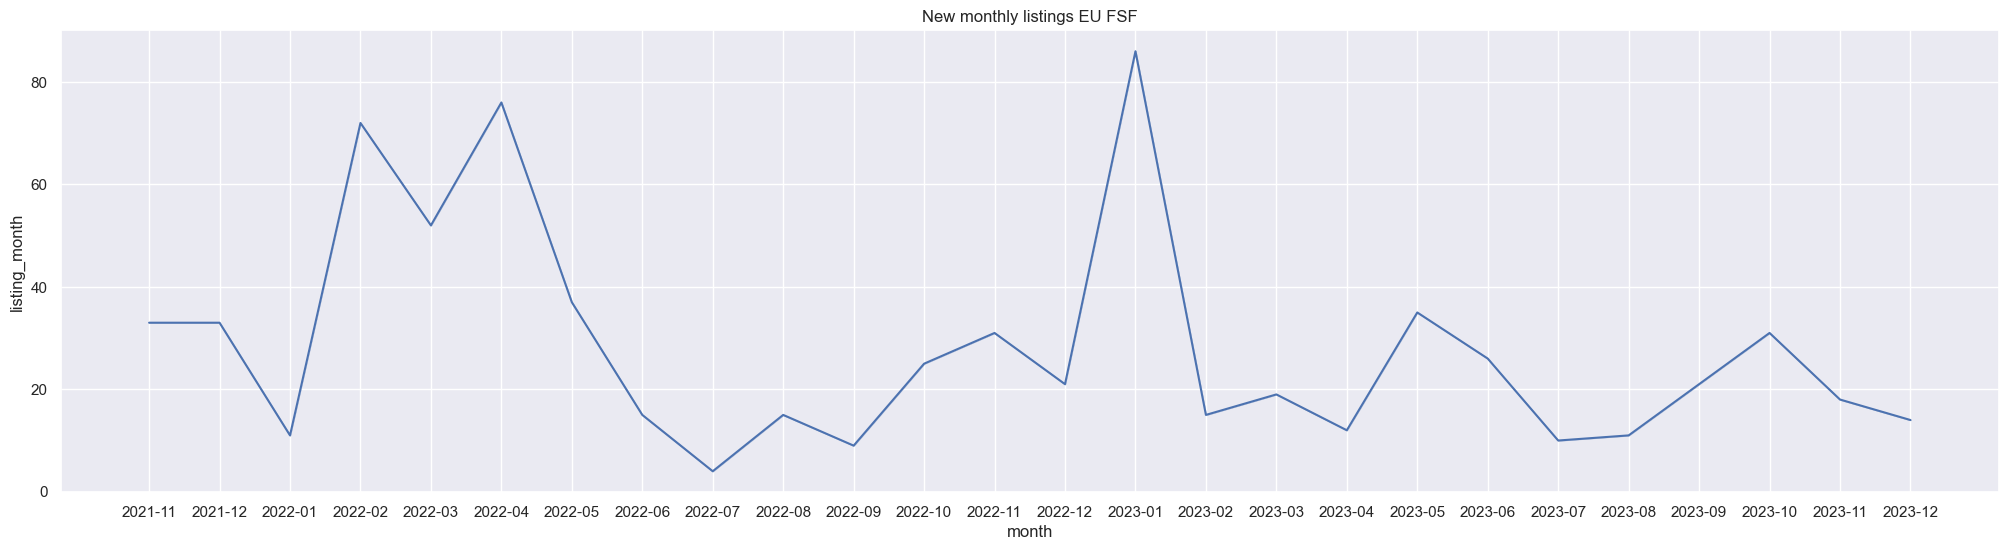

In [13]:
#get the total listings per month
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
listings_eu_fsf = sns.lineplot(data=data,x='month',y='listing_month').set_title('New monthly listings EU FSF')
listings_eu_fsf.figure.savefig('new_listings_all')
listings_eu_fsf

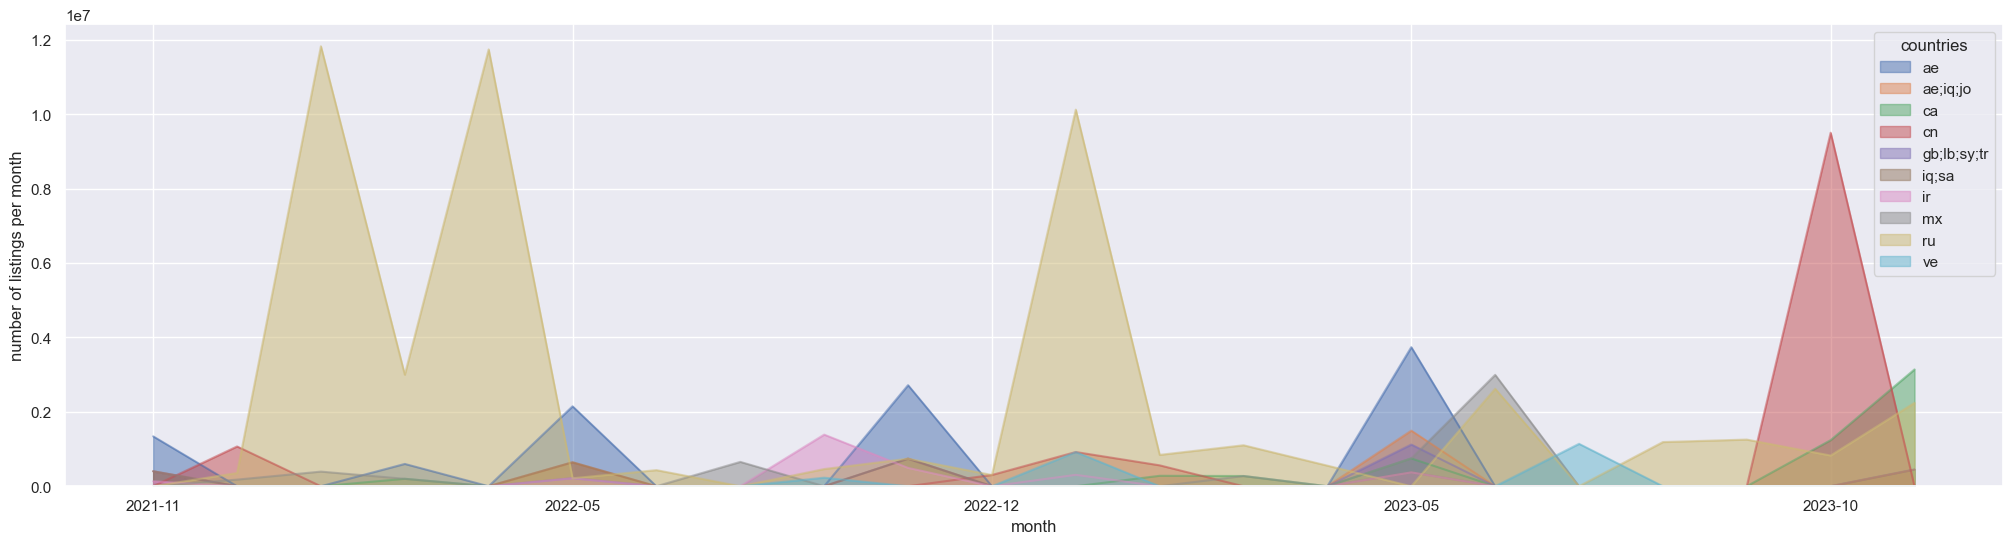

In [14]:
#time trend of the top iso codes
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
grouped2 = data.groupby(['countries', 'month']).agg({'listing_count': 'sum'})
top_countries2 = grouped2.groupby('countries').agg({'listing_count': 'sum'}).nlargest(10, 'listing_count').index.tolist()
filtered2 = grouped2[grouped2.index.get_level_values('countries').isin(top_countries2)]
pivoted2 = filtered2.reset_index().pivot(index='month', columns='countries', values='listing_count')
pivoted2.plot.area(stacked=False)

plt.xlabel('month')
plt.ylabel('number of listings per month')
plt.savefig('timetrend_all_stacked.png')

# Show the plot
plt.show()

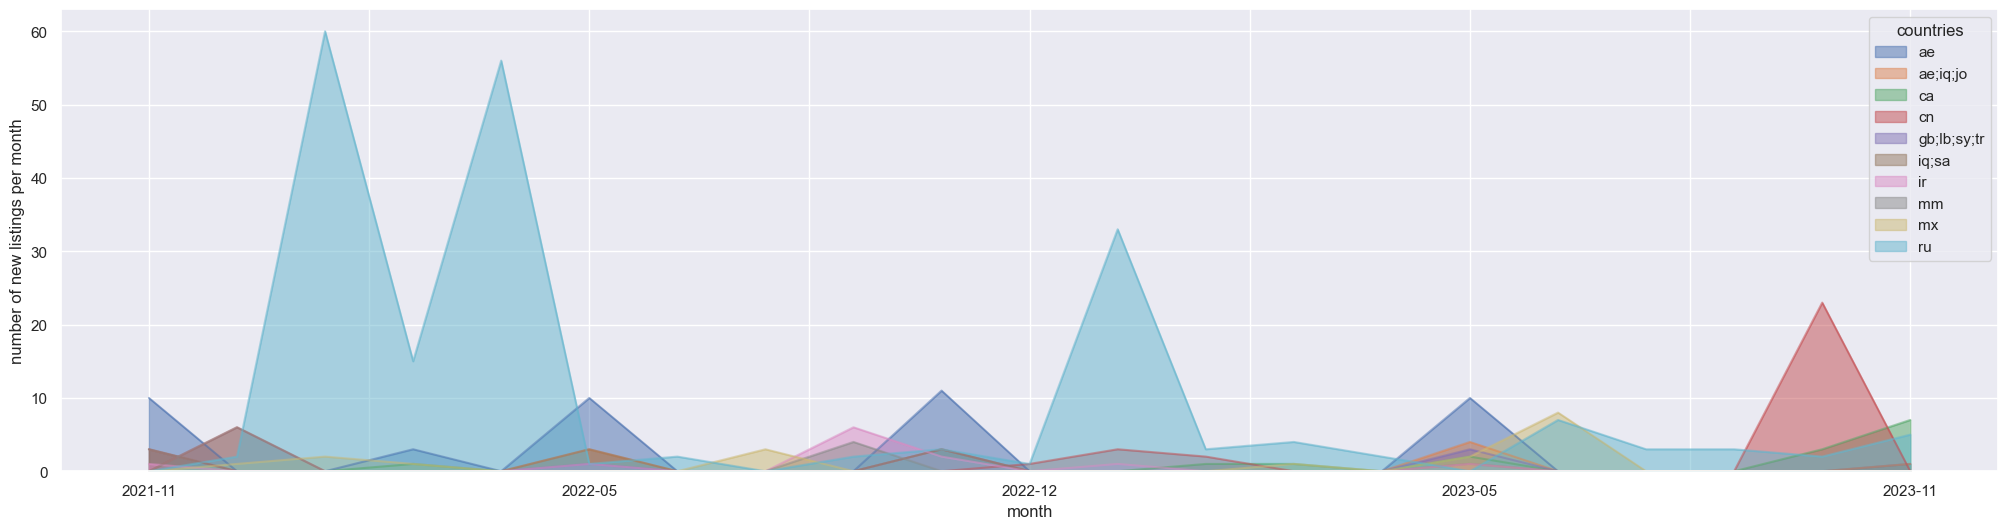

In [15]:
#time trend of the top iso codes
grouped2 = data.groupby(['countries', 'month']).agg({'new_listing_count': 'sum'})
top_countries2 = grouped2.groupby('countries').agg({'new_listing_count': 'sum'}).nlargest(10, 'new_listing_count').index.tolist()
filtered2 = grouped2[grouped2.index.get_level_values('countries').isin(top_countries2)]
pivoted2 = filtered2.reset_index().pivot(index='month', columns='countries', values='new_listing_count')
pivoted2.plot.area(stacked=False)

plt.xlabel('month')
plt.ylabel('number of new listings per month')
plt.savefig('timetrend_all_new_listings.png')

# Show the plot
plt.show()

In [16]:
#get the sates with the most new listings
data['listing_date'].value_counts().nlargest(10)

listing_date
20220420    69
20230126    61
20220223    44
20231003    28
20211211    26
20221108    24
20211119    23
20220514    23
20220312    21
20230510    19
Name: count, dtype: int64

In [17]:
#get the top shema
data['schema'].value_counts().nlargest(5)

schema
LegalEntity     374
Person          151
Company         113
Organization     70
Vessel           18
Name: count, dtype: int64

In [18]:
#get the top sanctions regime
data['sanctions'].value_counts().nlargest(25)

sanctions
SDN List - Block - Program - Executive Order 14024                                                                                                                                                    70
SDN List - Program - Block - Executive Order 14024                                                                                                                                                    60
SDN List - Block - Program - Executive Order 14024 - 2022-02-22                                                                                                                                       40
SDN List - Executive Order 14059 (Illicit Drugs)                                                                                                                                                      28
""                                                                                                                                                                                        

**filter russia**

TO DO: legal docs raussuchen!!!!

In [19]:
data_russ=data[data['countries'].str.contains("ru")==True]

In [20]:
print(data_russ.sanctions.unique())

['Block - SDN List - Program - Executive Order 13722 (North Korea) - 2021-12-10'
 'SDN List - Block - Program - Executive Order 14024 - 2022-02-22'
 'Executive Order 14024 Directive 3 - Program - Consolidated List - Executive Order 14024 - 2022-02-24'
 'Consolidated List - Executive Order 14024 Directive 1a - Program - Executive Order 14024 - 2022-02-22;Non-SDN Menu-Based Sanctions List - Executive Order 14024 Directive 1a - Program - Executive Order 14024 - 2022-02-22'
 'Program - Consolidated List - Executive Order 14024 Directive 2 - Executive Order 14024 - 2022-02-24'
 'Block - Program - SDN List - Executive Order 13687 (North Korea)'
 'Block - Program - SDN List - Executive Order 14024'
 'SDN List - Program - Block - Executive Order 14024'
 'SDN List - Program - Block - Magnitsky'
 'SDN List - Block - Program - Executive Order 14024'
 '2022-04-21 - 2022-10-18' '2022-04-07 - 2022-10-04'
 '2022-05-20 - 2022-11-16' '2022-06-24 - 2022-12-21'
 '2022-10-13 - 2023-04-11'
 '87 F.R. 21614 

In [21]:
data_russ2=data[data['sanctions'].str.contains("UKR - 2022|UKR - 2023")==True]

In [22]:
print(data_russ2.countries.unique())
print(data_russ2.sanctions.unique())

[]
[]


In [23]:
match= data_russ['countries'].equals(data_russ2['countries'])
print(match)

False


[Text(0.5, 1.0, 'new RUSSIA listings per month, EU FSF list')]

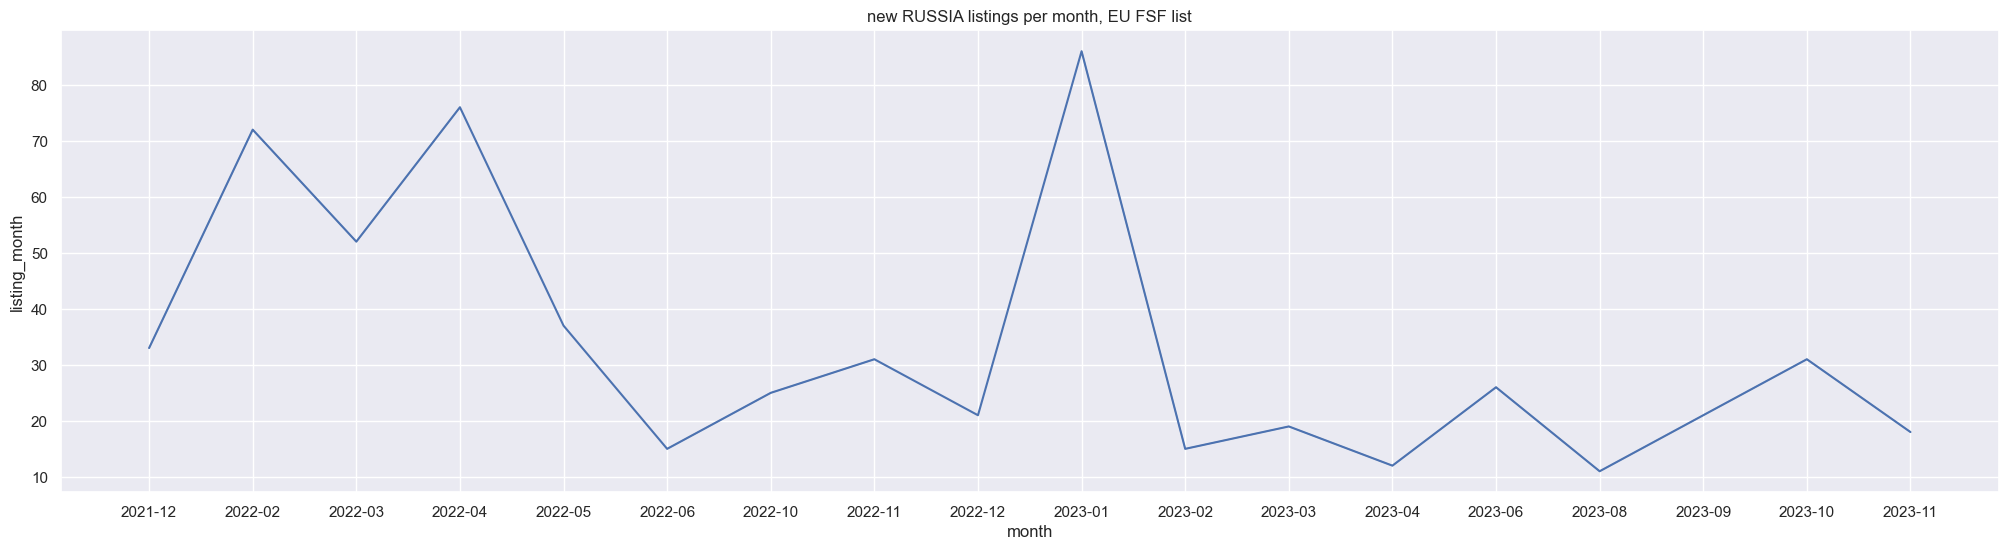

In [24]:
#make wider and remove outliers
data_russ = data_russ[data_russ['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ = sns.lineplot(data=data_russ,x='month',y='listing_month').set(title="new RUSSIA listings per month, EU FSF list")
plot_russ

[Text(0.5, 1.0, 'RUSSIA listings per month accumulated, EU FSF list')]

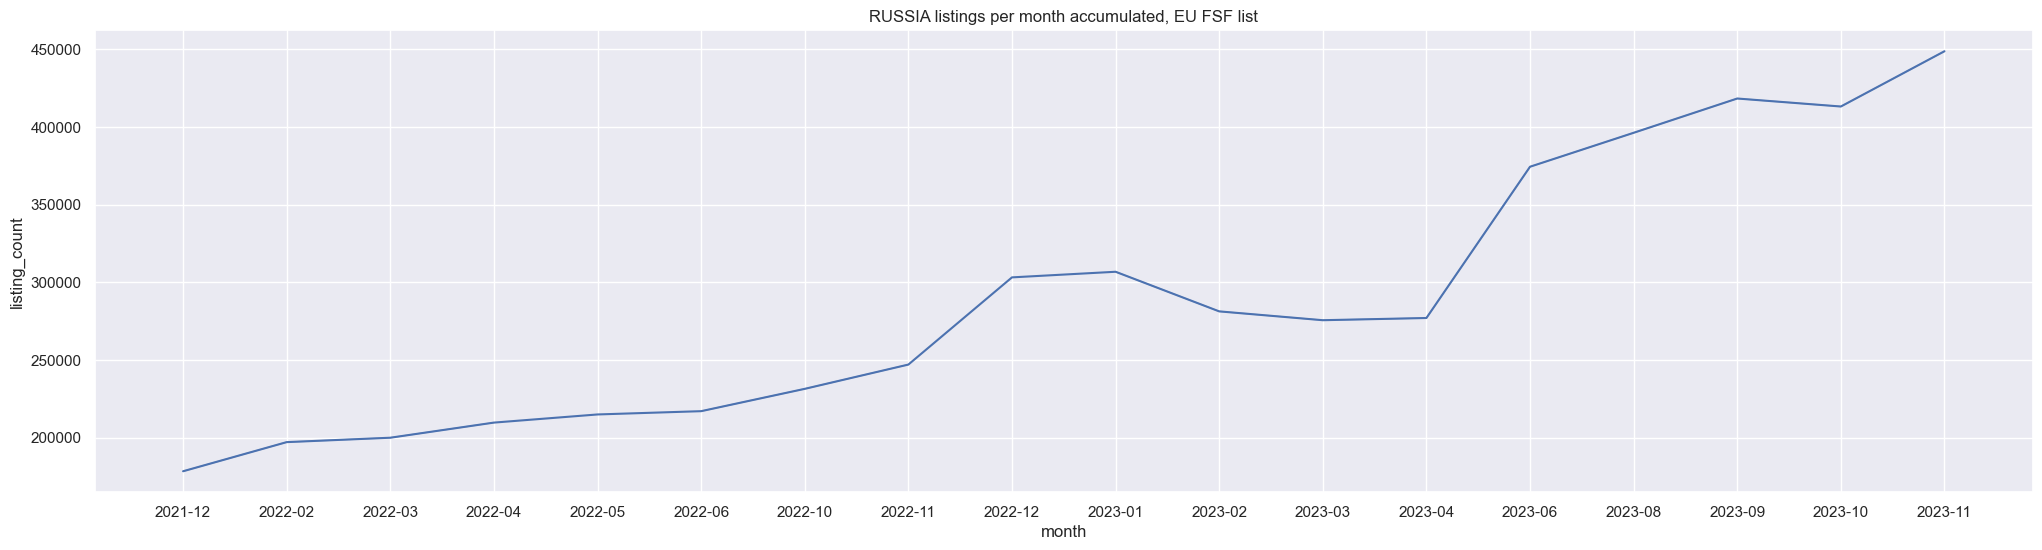

In [25]:
#make wider and remove outliers
data_russ = data_russ[data_russ['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ = sns.lineplot(data=data_russ,x='month',y='listing_count').set(title="RUSSIA listings per month accumulated, EU FSF list")
plot_russ

[Text(0.5, 1.0, 'new listings for legislation on Ukraine Invasion, EU FSF list')]

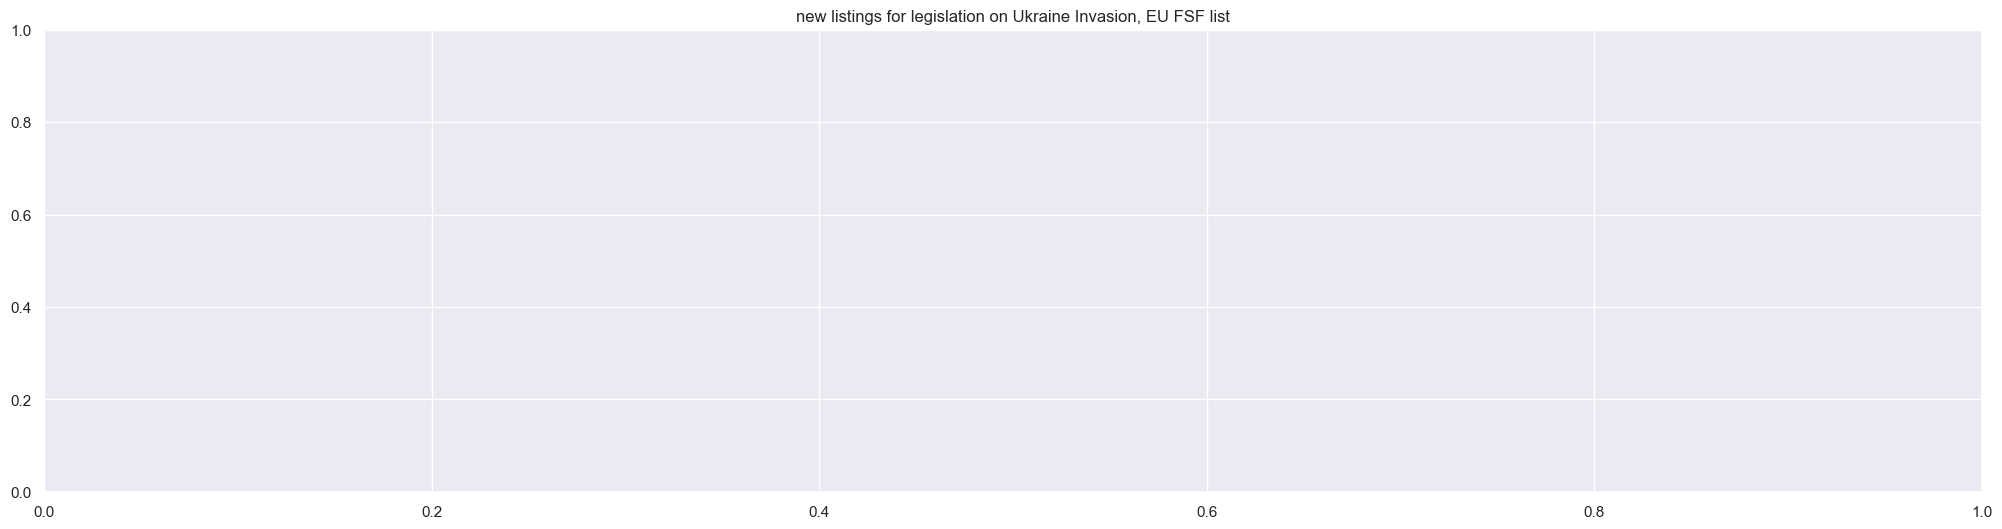

In [26]:
#make wider and remove outliers
data_russ2 = data_russ2[data_russ2['month'] > '2021-08']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ2 = sns.lineplot(data=data_russ2,x='month',y='listing_month').set(title="new listings for legislation on Ukraine Invasion, EU FSF list")
plot_russ2

[Text(0.5, 1.0, 'listings for legislationon Ukraine Invasion, EU FSF list')]

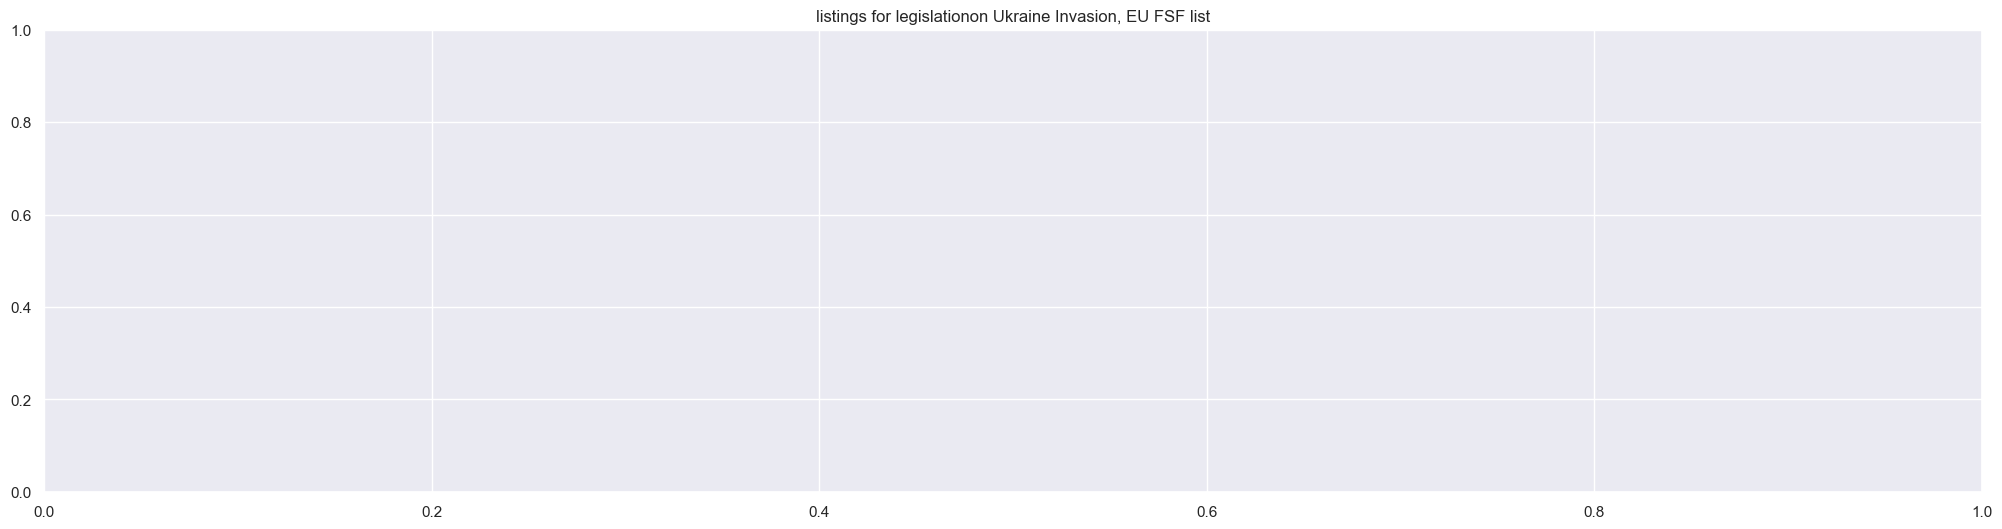

In [27]:
#make wider and remove outliers
data_russ2 = data_russ2[data_russ2['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ2 = sns.lineplot(data=data_russ2,x='month',y='listing_count').set(title="listings for legislationon Ukraine Invasion, EU FSF list")
plot_russ2

# add trigger events

In [28]:
conflict.describe
# get a month id
conflict['month'] = pd.to_datetime(conflict['conflict_event']).dt.to_period('M')
conflict_os['month'] = pd.to_datetime(conflict_os['conflict_event']).dt.to_period('M')

In [29]:
print(conflict.columns)
conflict = conflict.sort_values(by=['month'])
print(conflict)
print(conflict_os.columns)
conflict_os = conflict_os.sort_values(by=['month'])
print(conflict_os)
print(protest.columns)
protest = protest.sort_values(by=['month'])
print(protest)

Index(['Unnamed: 0', 'id', 'relid', 'year', 'type_of_violence', 'country',
       'country_id', 'fatality_best_estimate', 'gwnoa', 'gwnob',
       'conflict_event', 'iso', 'month'],
      dtype='object')
      Unnamed: 0      id                 relid  year  type_of_violence  \
1507       85255  327584    DRC-2020-2-15650-0  2020               2.0   
1872       85722  325549    DRC-2020-3-16065-4  2020               3.0   
1873       85723  327127    DRC-2020-3-16065-5  2020               3.0   
1542       85310  325162    DRC-2020-2-15892-0  2020               2.0   
997        83689  377179   DRC-2020-1-10509-21  2020               1.0   
...          ...     ...                   ...   ...               ...   
957        83165  460439    DRC-2022-3-2434-27  2022               3.0   
956        83164  460230    DRC-2022-3-2434-26  2022               3.0   
894        81915  460094    AFG-2022-3-973-669  2022               3.0   
2798       86694  460325    DRC-2022-2-17417-5  2022    

**now plot the association**

In [30]:
#transfrom month to string
conflict['month'] = conflict['month'].astype(str)
#conflict['month'] = pd.to_datetime(conflict['month'])
conflict.month.dtypes

conflict_os['month'] = conflict_os['month'].astype(str)
conflict_os.month.dtypes

protest['month'] = protest['month'].astype(str)
protest.month.dtypes

dtype('O')

In [31]:
#get the new listings per month toether with conflict fatalities and protest events
# combined plot
grouped_1 = data.groupby(['month']).agg({'new_listing_count': 'sum'})
grouped_2 = conflict.groupby(['month']).agg({'fatality_best_estimate': 'sum'})
grouped_3 = conflict_os.groupby(['month']).agg({'fatality_best_estimate': 'sum'})
grouped_4 = protest.groupby(['month']).agg({'event_count': 'sum'})
grouped_1 = grouped_1.reset_index()
grouped_2 = grouped_2.reset_index()
grouped_3 = grouped_3.reset_index()
grouped_4 = grouped_4.reset_index()

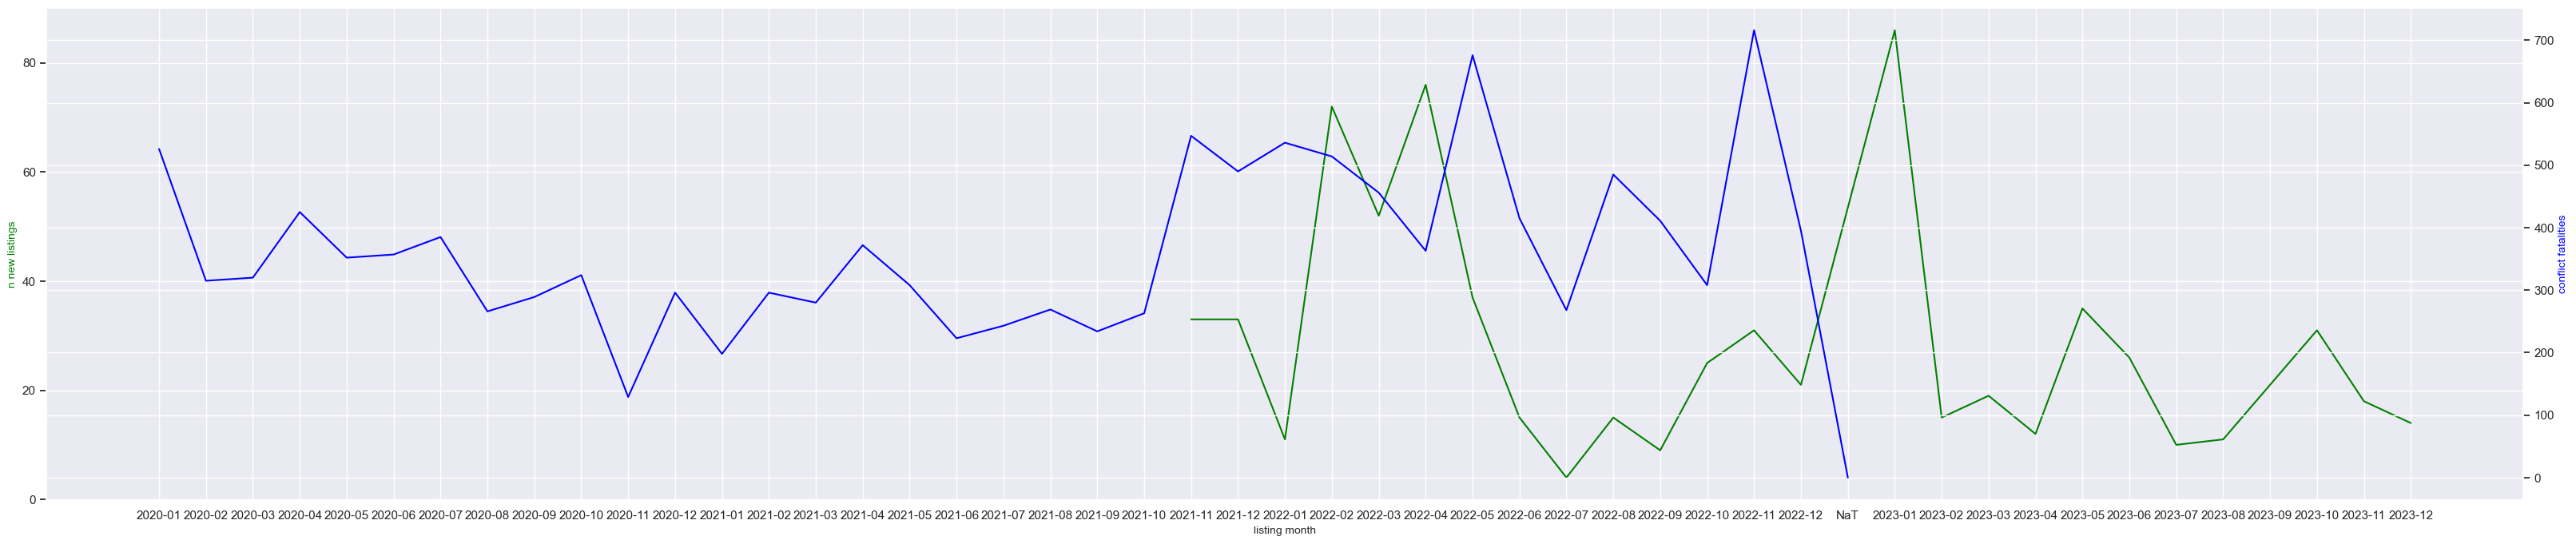

In [32]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(grouped_2.month, grouped_2["fatality_best_estimate"],color="blue")
ax2.set_ylabel("conflict fatalities",color="blue",fontsize=10)
plt.savefig('timetrend_all_conflict.png')
plt.show()

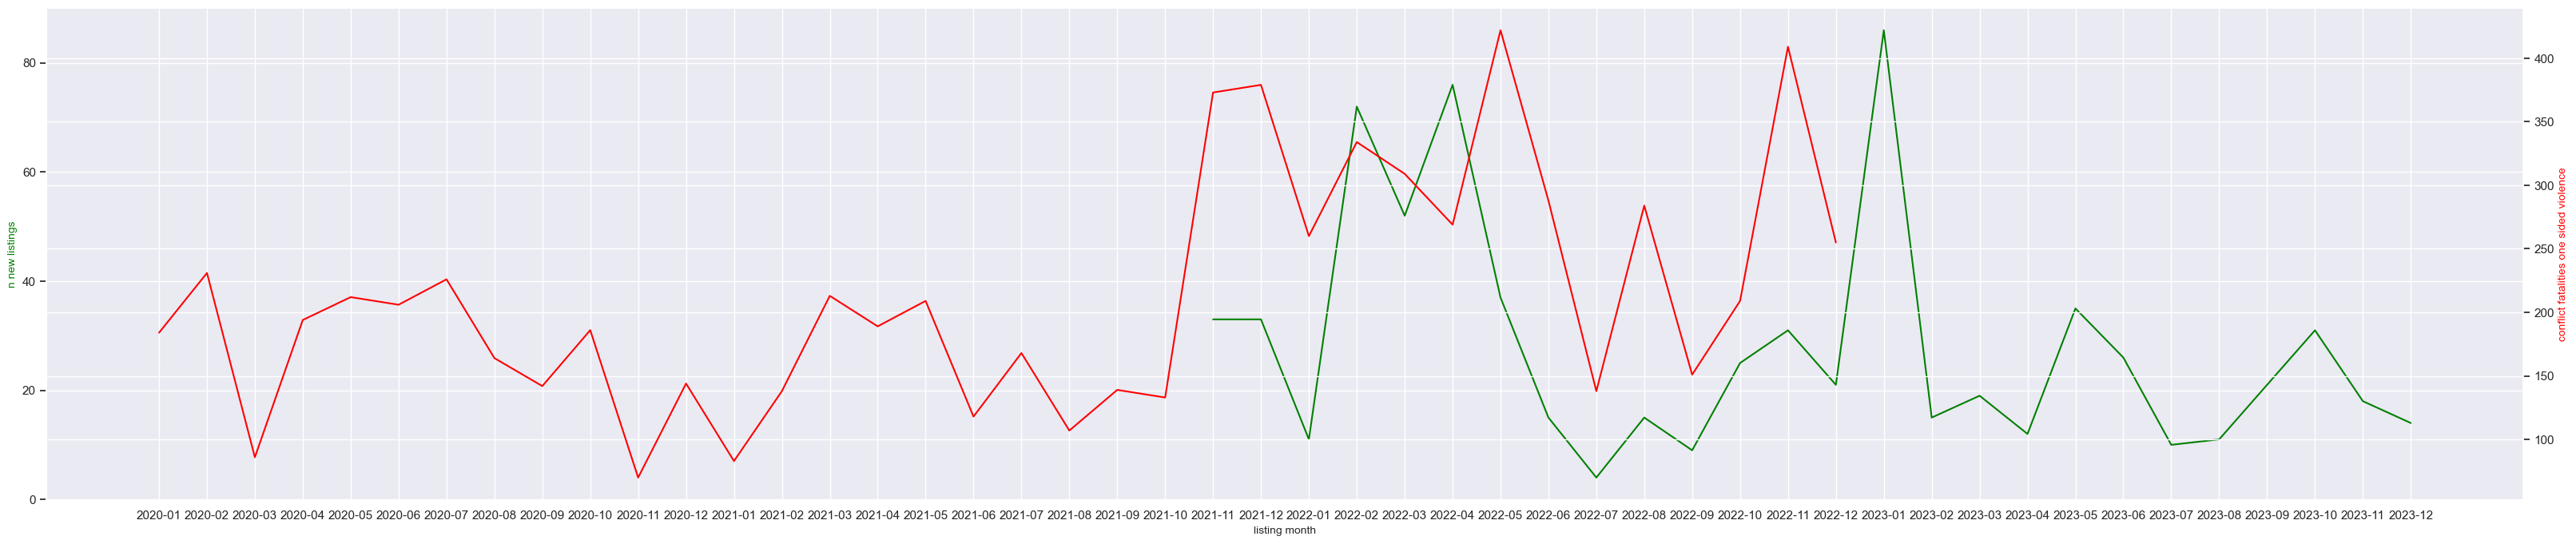

In [33]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax3=ax.twinx()
# make a plot with different y-axis using second axis object
ax3.plot(grouped_3.month, grouped_3["fatality_best_estimate"],color="red")
ax3.set_ylabel("conflict fatalities one sided violence",color="red",fontsize=10)
plt.savefig('timetrend_all_conflict_os.png')

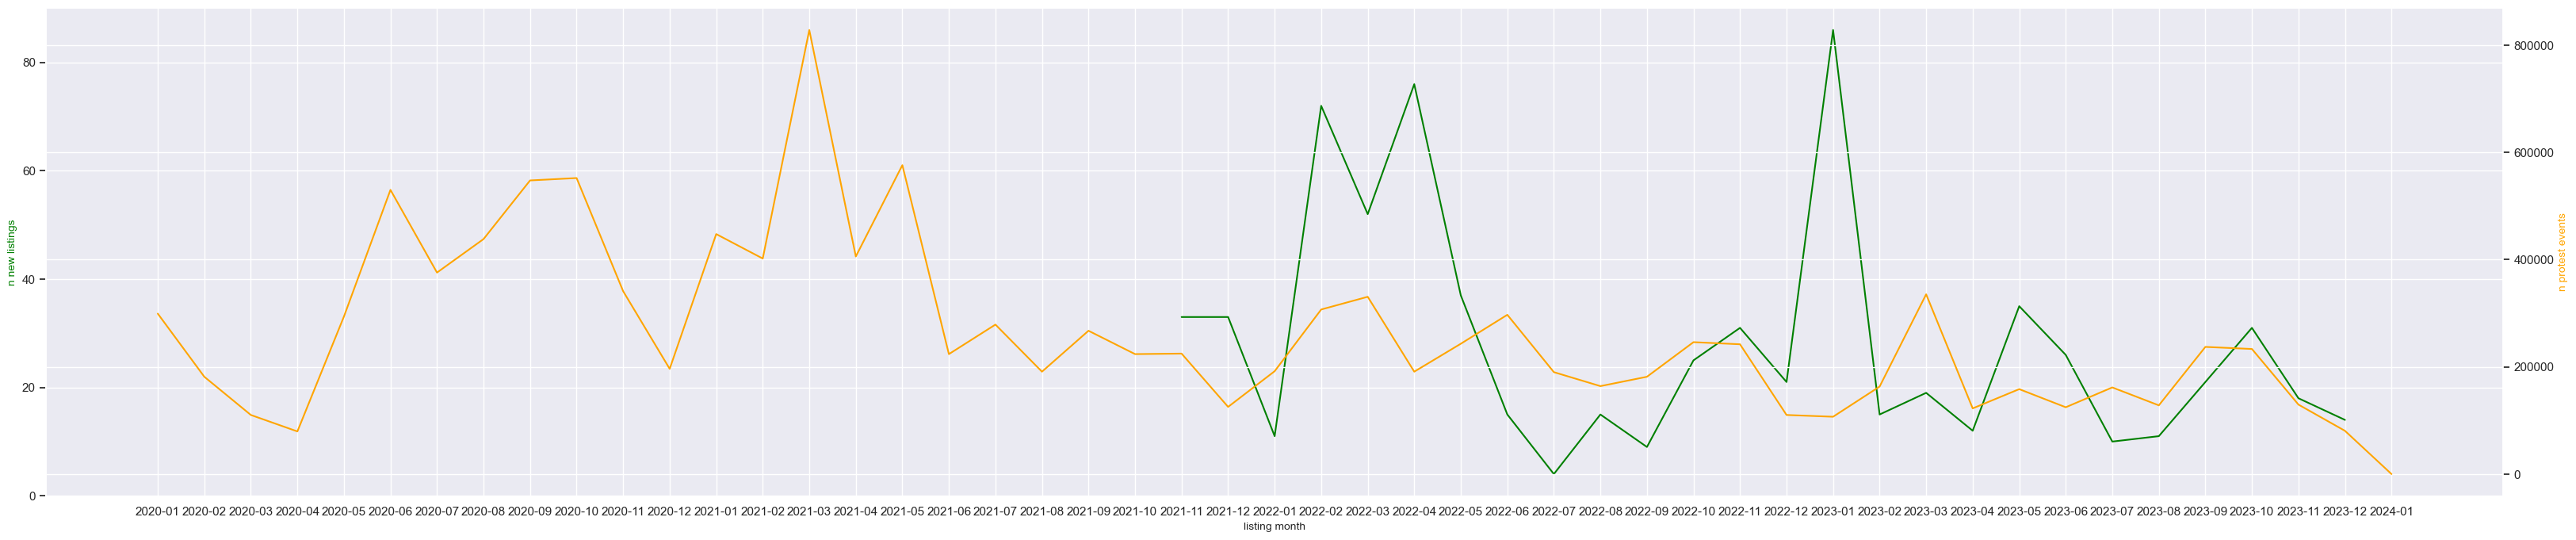

In [34]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax4=ax.twinx()
# make a plot with different y-axis using second axis object
ax4.plot(grouped_4.month, grouped_4["event_count"],color="orange")
ax4.set_ylabel("n protest events",color="orange",fontsize=10)
plt.savefig('timetrend_all_protest.png')

**perform Analysis**

In [35]:
#filter the listings
data = data.copy()
data = data[data['month'] < '2023-01']
data.month.unique()
#filter the trigger events
conflict = conflict.copy()
conflict = conflict[conflict['month'] > '2021-09']
print(conflict.month.unique())

conflict_os = conflict_os.copy()
conflict_os = conflict_os[conflict_os['month'] > '2021-09']
print(conflict_os.month.unique())

protest = protest.copy()
protest = protest[protest['month'] > '2021-09']
protest = protest[protest['month'] < '2023-01']
print(protest.month.unique())

['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12' 'NaT']
['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12']
['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12']


In [36]:
import scipy
from scipy import stats
import statsmodels
#conflict fatalities
print('conflict')
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict.dropna()['fatality_best_estimate'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict['fatality_best_estimate'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

#one-sided violence
print('one-sided violence')
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict_os.dropna()['fatality_best_estimate'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict_os['fatality_best_estimate'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

#protest events
print('Protest')
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(protest.dropna()['event_count'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(protest['event_count'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

conflict
T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: nan
P-value (ANOVA): nan
one-sided violence
T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: 2523.698453922607
P-value (ANOVA): 6.6744878895e-314
Protest
T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: 18523.050605989847
P-value (ANOVA): 0.0


**now for russia case study**

In [37]:
import scipy
from scipy import stats
import statsmodels
#conflict fatalities
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict.dropna()['fatality_best_estimate'],data_russ.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results conflict fatalities:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict['fatality_best_estimate'],data_russ['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results conflict fatalities:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


#conflict fatalities OS violence
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict_os.dropna()['fatality_best_estimate'],data_russ.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results os_violence:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict_os['fatality_best_estimate'],data_russ['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results os_violence:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


#Protest events
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(protest.dropna()['event_count'],data_russ.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results protest:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(protest['event_count'],data_russ['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results protest:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

T-Test Results conflict fatalities:
T-statistic: nan
P-value: nan

ANOVA Results conflict fatalities:
F-statistic: nan
P-value (ANOVA): nan
T-Test Results os_violence:
T-statistic: nan
P-value: nan

ANOVA Results os_violence:
F-statistic: 4478.615704234628
P-value (ANOVA): 0.0
T-Test Results protest:
T-statistic: nan
P-value: nan

ANOVA Results protest:
F-statistic: 8387.88236668416
P-value (ANOVA): 0.0


In [38]:
#conflict fatalities
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict.dropna()['fatality_best_estimate'],data_russ2.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results conflict fatalities:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict['fatality_best_estimate'],data_russ2['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results conflict fatalities:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


#conflict fatalities OS violence
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict_os.dropna()['fatality_best_estimate'],data_russ2.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results one-sided violence:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict_os['fatality_best_estimate'],data_russ2['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results one-sided violence:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


#Protest events
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(protest.dropna()['event_count'],data_russ2.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results protest events:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(protest['event_count'],data_russ2['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results protest events:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

T-Test Results conflict fatalities:
T-statistic: nan
P-value: nan

ANOVA Results conflict fatalities:
F-statistic: nan
P-value (ANOVA): nan
T-Test Results one-sided violence:
T-statistic: nan
P-value: nan

ANOVA Results one-sided violence:
F-statistic: nan
P-value (ANOVA): nan
T-Test Results protest events:
T-statistic: nan
P-value: nan

ANOVA Results protest events:
F-statistic: nan
P-value (ANOVA): nan


C:\Users\cecilianatalie.strom\bin\conda\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '
